In [1]:
#Import Library
import os
import shutil
import glob
import cv2
import numpy as np

In [2]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#GPU 
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
#데이터를 배열로 초기화
data = {}
data['crack'] = []
data['uncrack'] = []

In [5]:
#Crack Data
src = '/content/drive/MyDrive/딥러닝 오소리 /Data Set/10000 DataSet/Positive'
for jpgImage in glob.iglob(os.path.join(src, '*jpg')):
    data['crack'].append(jpgImage)
print(len(data['crack']))

10000


In [6]:
#Uncrack Data
src = '/content/drive/MyDrive/딥러닝 오소리 /Data Set/10000 DataSet/Negative'
for jpgImage in glob.iglob(os.path.join(src, '*jpg')):
    data['uncrack'].append(jpgImage)
print(len(data['uncrack']))

10000


In [7]:
#Create File
os.mkdir('master_data_concrete')
os.mkdir('master_data_concrete/training')
os.mkdir('master_data_concrete/validation')
os.mkdir('master_data_concrete/test')

os.mkdir('master_data_concrete/training/crack')
os.mkdir('master_data_concrete/training/uncrack')
os.mkdir('master_data_concrete/validation/crack')
os.mkdir('master_data_concrete/validation/uncrack')
os.mkdir('master_data_concrete/test/crack')
os.mkdir('master_data_concrete/test/uncrack')

In [11]:
#Data shuffle
from sklearn.model_selection import train_test_split
import sys

X = data['crack'] #Data
Y = np.zeros((len(data['crack']))) #Labels

#X_S : test = 8:2 => train : valid = 5:5
X_S, X_test, Y_S, Y_test = train_test_split(X,Y, test_size=0.2)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_S,Y_S, test_size=0.5)
assert len(X_train) == len(data['crack'])/10*4 , 'Data Numeric Error'

#Data Check
print('X_train Data list =',len(X_train), '   Y_train Label list =',len(Y_train))
print('X_valid Data list =',len(X_valid), '   Y_valid Label list =',len(Y_valid))
print('X_test Data list =',len(X_test), '   Y_test Label list =',len(Y_test))

X_train Data list = 4000    Y_train Label list = 4000
X_valid Data list = 4000    Y_valid Label list = 4000
X_test Data list = 2000    Y_test Label list = 2000


In [12]:
#image copy
from tqdm.auto import tqdm

base_dest = 'master_data_concrete'

#copy training  images of crack type
for image in tqdm(X_train):
        dest = os.path.join(base_dest, 'training', 'crack')
        shutil.copy(image, dest)

#copy validation images of crack type
for image in tqdm(X_valid):
        dest = os.path.join(base_dest, 'validation', 'crack')
        shutil.copy(image, dest)

#copy test images of crack type
for image in tqdm(X_test):
        dest = os.path.join(base_dest, 'test', 'crack')
        shutil.copy(image, dest)

In [ ]:
base_dest = 'master_data_concrete'
dest = os.path.join(base_dest, 'training','crack')
dest

'master_data_concrete/training/crack'

In [13]:
#Data shuffle
X = data['uncrack'] #Data
Y = np.zeros((len(data['uncrack']))) #Labels

#X_S : test = 8:2 => train : valid = 5:5
X_S, X_test, Y_S, Y_test = train_test_split(X,Y, test_size=0.2)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_S,Y_S, test_size=0.5)
assert len(X_train) == len(data['crack'])/10*4 , 'Data Numeric Error'

#Data Check
print('X_train Data list =',len(X_train), '   Y_train Label list =',len(Y_train))
print('X_valid Data list =',len(X_valid), '   Y_valid Label list =',len(Y_valid))
print('X_test Data list =',len(X_test), '   Y_test Label list =',len(Y_test))

X_train Data list = 4000    Y_train Label list = 4000
X_valid Data list = 4000    Y_valid Label list = 4000
X_test Data list = 2000    Y_test Label list = 2000


In [14]:
#image copy
base_dest = 'master_data_concrete'

#copy training  images of uncrack type
for image in tqdm(X_train):
        dest = os.path.join(base_dest, 'training', 'uncrack')
        shutil.copy(image, dest)

#copy testing images of uncrack type
for image in tqdm(X_valid):
        dest = os.path.join(base_dest, 'validation', 'uncrack')
        shutil.copy(image, dest)

#copy test images of crack type
for image in tqdm(X_test):
        dest = os.path.join(base_dest, 'test', 'uncrack')
        shutil.copy(image, dest)

In [15]:
#Model Library
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks  import EarlyStopping, LambdaCallback
from keras.layers import Activation, Dropout,Input, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#Convolutional Layer
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
model.add(BatchNormalization(axis=-1)) #Normalize Batch
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#Output Layer
model.add(Flatten())  #3D를 1D로 벡터 변환
model.add(Dense(256))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) 
model.add(BatchNormalization(axis=-1))
model.add(Activation('sigmoid'))  #or model.add(Activation('softmax')) // two output softmax == one output sigmoid

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 225, 225, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 225, 225, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 32)      0

In [ ]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False, smart_resize=False
)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 30
epochs = 20

#스케일 조정 및 과적합 방지
train_datagen = ImageDataGenerator (
        rescale=1./255, 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#validation,test에 사용할 확장구성
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#train, validation, test 모든 이미지 크기 = 227*227
train_generator = train_datagen.flow_from_directory(
        '/content/master_data_concrete/training',  
        target_size=(227, 227), 
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='binary')   #binary_crossentropy loss를 사용하기 위한 binary label

#검증 데이터
validation_generator = validation_datagen.flow_from_directory(
        '/content/master_data_concrete/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='binary')

#테스트 데이터
test_generator = test_datagen.flow_from_directory(
       '/content/master_data_concrete/test',
       target_size=(227, 227),
       batch_size=batch_size,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [27]:
#Generator Data Verification
train_ver = next(iter(train_generator))
print('train_generator: ', train_ver)

validation_ver = next(iter(validation_generator))
print('validation_generator: ', validation_ver)

test_ver = next(iter(test_generator))
print('test_generator: ', test_ver)

train_generator:  (array([[[[0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         ...,
         [0.7188433 , 0.69923544, 0.675706  ],
         [0.7148994 , 0.6952916 , 0.67176217],
         [0.71155375, 0.6919459 , 0.6684165 ]],

        [[0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         ...,
         [0.7188433 , 0.69923544, 0.675706  ],
         [0.7148994 , 0.6952916 , 0.67176217],
         [0.71155375, 0.6919459 , 0.6684165 ]],

        [[0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         [0.7254902 , 0.70980394, 0.6666667 ],
         ...,
         [0.7188433 , 0.69923544, 0.675706  ],
         [0.7148994 , 0.6952916 , 0.67176217],
         [0.71155375, 0.6919459 , 0.6684165 ]],

        ...,

        [[0.70948637, 0.6938001 , 0.6467412 ],
         [0.7339265 , 0.71

In [ ]:
#만약 overfitting, underfitting 을 일으키면 EarlyStopping을 쓰기 위한 코드  or callback 함수 적용
#patience가 5면 validation score가 5회 이상 개선이 없을때 훈련을 멈춘다

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)

In [28]:
#Model Learning
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) #rmsprop or adam or sgd , accuracy or f1-score  (positive와 negative의 데이터 값 차이가 높을 경우)
history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator) #callbacks=[es])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
267/267 [==============================] - 129s 360ms/step - loss: 0.3690 - accuracy: 0.9246 - val_loss: 0.9361 - val_accuracy: 0.5000
Epoch 2/20
267/267 [==============================] - 95s 356ms/step - loss: 0.2436 - accuracy: 0.9785 - val_loss: 0.2752 - val_accuracy: 0.9429
Epoch 3/20
267/267 [==============================] - 95s 357ms/step - loss: 0.1859 - accuracy: 0.9864 - val_loss: 0.1331 - val_accuracy: 0.9912
Epoch 4/20
267/267 [==============================] - 95s 356ms/step - loss: 0.1522 - accuracy: 0.9884 - val_loss: 0.1152 - val_accuracy: 0.9909
Epoch 5/20
267/267 [==============================] - 94s 352ms/step - loss: 0.1279 - accuracy: 0.9900 - val_loss: 0.0969 - val_accuracy: 0.9931
Epoch 6/20
267/267 [==============================] - 93s 348ms/step - loss: 0.1128 - accuracy: 0.9888 - val_loss: 0.0884 - val_accuracy: 0.9952
Epoch 7/20
267/267 [==============================] - 93s 347ms/step - loss: 0.1016 - accuracy: 0.9905 - val_loss: 0.0702 - val_a

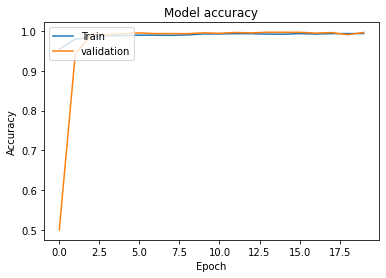

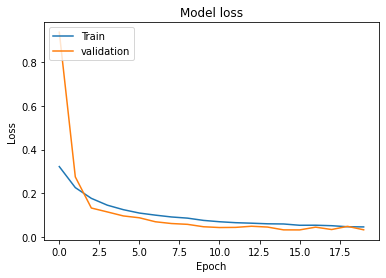

In [29]:
#훈련 및 검증 정확도 시각화
#학습 정확성 값과 검증 정확성 값
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [30]:
#model test
loss, accuracy = model.evaluate_generator(test_generator)
print('test loss: ', loss, '\ntest accuracy: ', accuracy)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test loss:  0.03312322497367859 
test accuracy:  0.9975000023841858


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgt7of0qy/assets
